# Visualizing `BinaryMFThreshold`

Visualizing the gradient of the objective function `F` with respect to the threshold `u` and `v`.

The initial factorization `U` and `V` are from NMF.

In [42]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

[I] Found settings.ini at /Users/felixnie/MEGA/PyBMF/examples/settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


/Users/felixnie/MEGA/PyBMF/examples/../PyBMF/datasets/BaseData.py:101: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(handle)


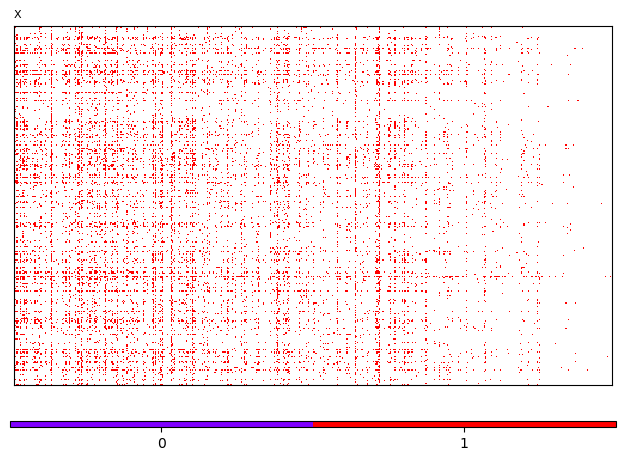

<Figure size 640x480 with 0 Axes>

In [44]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [45]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')
split.negative_sample(
    size=split.pos_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1722645872
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1722645872
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 2023


In [46]:
# shared parameters

k = 20
W = 'full'
max_iter = 1000

# Init `U`, `V` with NMF

There is no point to init with `BinaryMFPenalty` (e.g., `NMFSklearn` followed by `BinaryMFPenalty` and then `BinaryMFThreshold`), as the factors are already (near) binary. It's meaningful when the factors are poorly binarized, like in `FastStep`.

[I] k            : 20
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-03 08-44-32-348250 NMFSklearn
[I] U, V existed. Skipping initialization.
[I] time elapsed :  0s


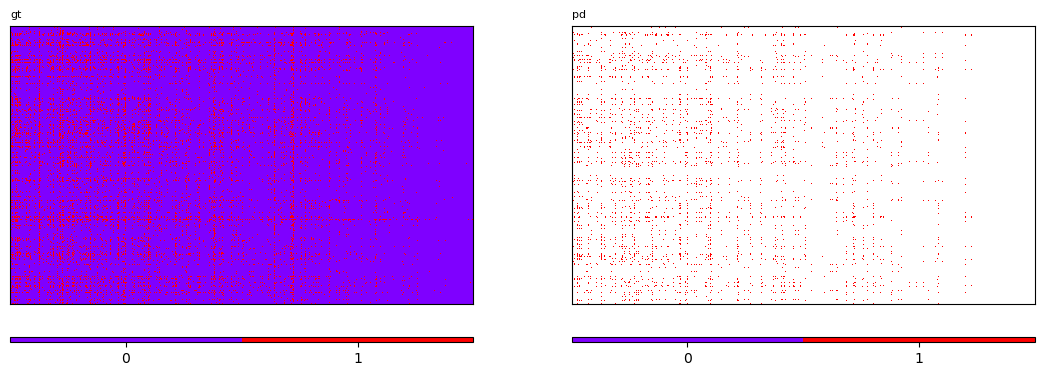

<Figure size 640x480 with 0 Axes>

In [47]:
from PyBMF.models import NMFSklearn, WNMF
from PyBMF.utils import show_factor_distribution

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=max_iter, seed=2024)
model_nmf.fit(X_train=X_train, save_model=False)

# model_nmf = WNMF(k=k, W=W, beta_loss='frobenius', init_method='normal', max_iter=1000, seed=2024)
# model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False, show_logs=False, show_result=True, save_model=False)

# Visualizing objective function `F`

This is to show that as long as `lamda` is large enough, the objective function `F` will have a reasonable minimum around the optimal solution.

When the `lamda` is too large, it may create more local minima.

Also, the optimal solution given by the grid search `SimpleThreshold` can be a little bit different from the minimum of `BinaryMFThreshold`. This is caused by the different way they use to represent Boolean logic.

[I] k            : 20
[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] u            : 0.29938050310162523
[I] v            : 0.5348506350885143
[I] lamda        : 1
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 1
[I] init_method  : custom
[I] normalize_method : None
[I] seed         : 1722645930
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-03 08-45-30-891958 BinaryMFThreshold


[I] threshold: [1.913, 2.318], F: 7411.7048, U: [0.000, 3.892], V: [0.000, 2.318]: 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

update a:  3.814697265625e-06 3.7905954208527746e-06
3.8919, 2.3177
3.8919, 4.5053
0.0000, 0.0000
update a:  3.7905954208527746e-06 1.7020644899056997e-06
3.8919, 2.3177
1.9125, 2.3177
0.0000, 0.0000
update a:  0.000244140625 0.0
3.8919, 2.3177
1.9125, 2.3177
0.0000, 0.0000


[I] threshold: [1.913, 2.318], F: 7411.7048, U: [0.000, 3.892], V: [0.000, 2.318]: : 2it [00:00,  6.44it/s]                     


[W] Stopped in advance: Reach maximum iteration
[W] Stopped in advance: Difference lower than threshold
[I] time elapsed :  0s


100%|██████████| 50/50 [00:15<00:00,  3.22it/s]


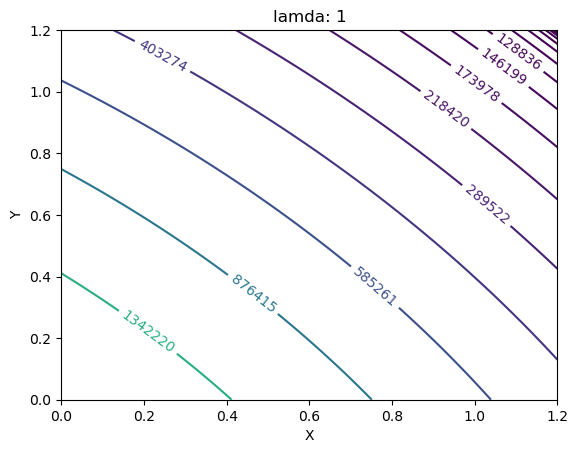

[I] k            : 20
[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] u            : 0.29938050310162523
[I] v            : 0.5348506350885143
[I] lamda        : 5
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 1
[I] init_method  : custom
[I] normalize_method : None
[I] seed         : 1722645947
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-03 08-45-47-179046 BinaryMFThreshold


[I] threshold: [0.386, 0.737], F: 4149.5244, U: [0.000, 3.892], V: [0.000, 2.318]: : 2it [00:00,  4.96it/s]                     


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  0s


100%|██████████| 50/50 [00:17<00:00,  2.86it/s]


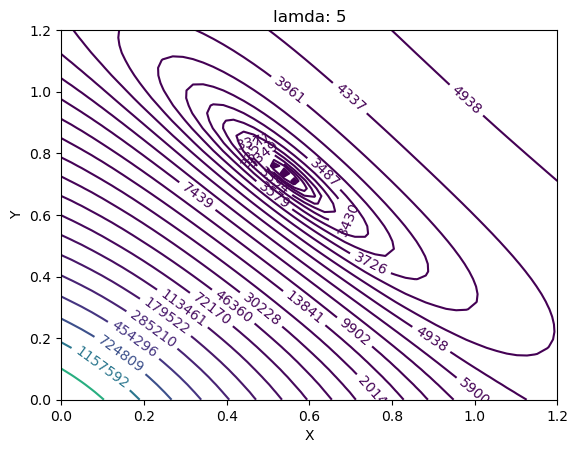

[I] k            : 20
[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] u            : 0.29938050310162523
[I] v            : 0.5348506350885143
[I] lamda        : 10
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 1
[I] init_method  : custom
[I] normalize_method : None
[I] seed         : 1722645965
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-03 08-46-05-617117 BinaryMFThreshold


[I] threshold: [0.354, 0.540], F: 2901.3155, U: [0.000, 3.892], V: [0.000, 2.318]: : 2it [00:00,  7.62it/s]                     


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  0s


100%|██████████| 50/50 [00:17<00:00,  2.80it/s]


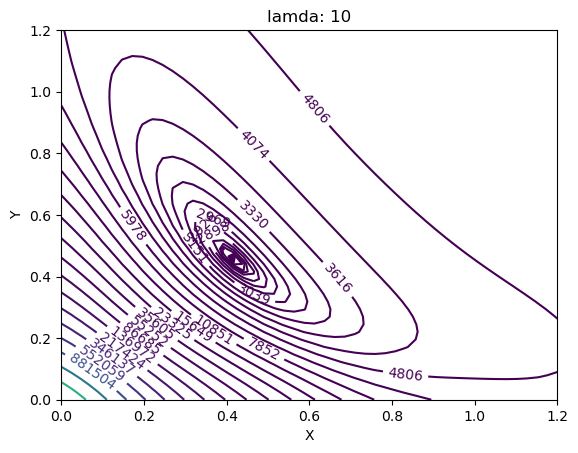

[I] k            : 20
[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] u            : 0.29938050310162523
[I] v            : 0.5348506350885143
[I] lamda        : 15
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 1
[I] init_method  : custom
[I] normalize_method : None
[I] seed         : 1722645984
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-03 08-46-24-063633 BinaryMFThreshold


[I] threshold: [0.319, 0.507], F: 3193.3104, U: [0.000, 3.892], V: [0.000, 2.318]: : 2it [00:00,  5.81it/s]                     


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  0s


100%|██████████| 50/50 [00:16<00:00,  3.05it/s]


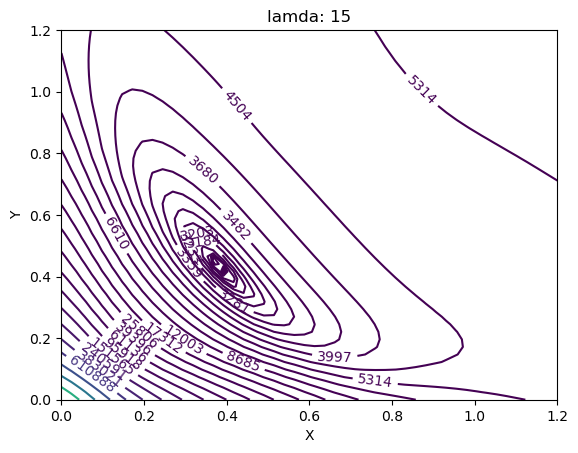

[I] k            : 20
[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] u            : 0.29938050310162523
[I] v            : 0.5348506350885143
[I] lamda        : 20
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 1
[I] init_method  : custom
[I] normalize_method : None
[I] seed         : 1722646001
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-03 08-46-41-167880 BinaryMFThreshold


[I] threshold: [0.321, 0.517], F: 3424.8505, U: [0.000, 3.892], V: [0.000, 2.318]: : 2it [00:00,  6.37it/s]                     


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  0s


100%|██████████| 50/50 [00:20<00:00,  2.48it/s]


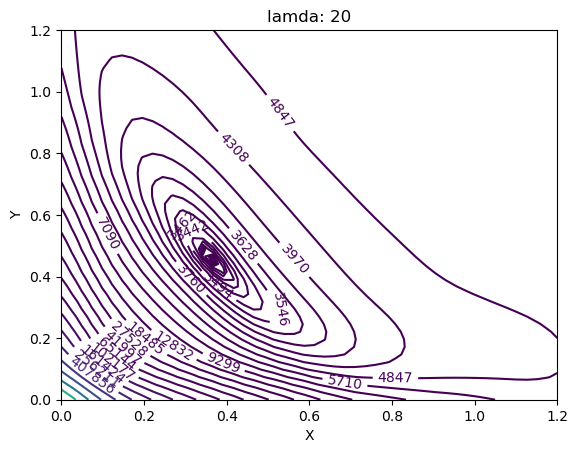

[I] k            : 20
[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] u            : 0.29938050310162523
[I] v            : 0.5348506350885143
[I] lamda        : 100
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 1
[I] init_method  : custom
[I] normalize_method : None
[I] seed         : 1722646022
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-03 08-47-02-016573 BinaryMFThreshold


[I] threshold: [0.340, 0.540], F: 4132.3772, U: [0.000, 3.892], V: [0.000, 2.318]: : 2it [00:00,  4.91it/s]                     


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  0s


100%|██████████| 50/50 [00:23<00:00,  2.13it/s]


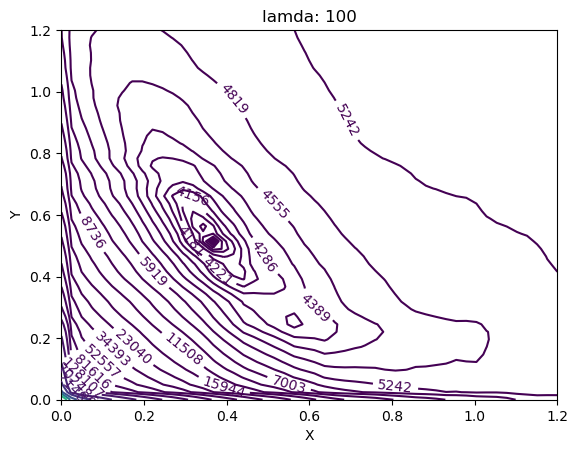

In [56]:
# matplotlib settings

%matplotlib inline

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

N = 50
dpi = 100


for lamda in [1, 5, 10, 15, 20, 100]:

    # init a model with different lamda and load the sample data

    from PyBMF.models import BinaryMFThreshold

    U, V = model_nmf.U.copy(), model_nmf.V.copy()

    u, v = 0.5, 0.5

    task = 'reconstruction'
    init_method = 'custom'
    solver = 'line-search'

    model = BinaryMFThreshold(k=k, U=U, V=V, W=W, u=u, v=v, lamda=lamda, init_method=init_method, max_iter=1, solver=solver, normalize_method=None)
    model.fit(X_train=X_train, X_val=None, X_test=None, task=task, verbose=False, display=False, show_logs=False, show_result=False, save_model=False)


    # plot contour

    x = np.linspace(0, 1.2, N)
    y = np.linspace(0, 1.2, N)
    Z = np.zeros([N, N])
    X, Y = np.meshgrid(x, y)
    for i in tqdm(range(N)):
        for j in range(N):
            Z[i, j] = model.F([X[i, j], Y[i, j]])
            
    levels = np.logspace(0, 10, num=50, endpoint=True, base=10)
    levels = (levels - levels.min()) / (levels.max() - levels.min())
    levels = levels * (Z.max() - Z.min()) + Z.min()

    plt.figure(dpi=dpi)
    cp = plt.contour(X, Y, Z, levels=levels)
    plt.clabel(cp, inline=1, fontsize=10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'lamda: {lamda}')
    plt.show()

# Visualizing gradient function `dF`

You should see a quiver plot that matches the plot of the contour above.

100%|██████████| 50/50 [00:06<00:00,  7.27it/s]


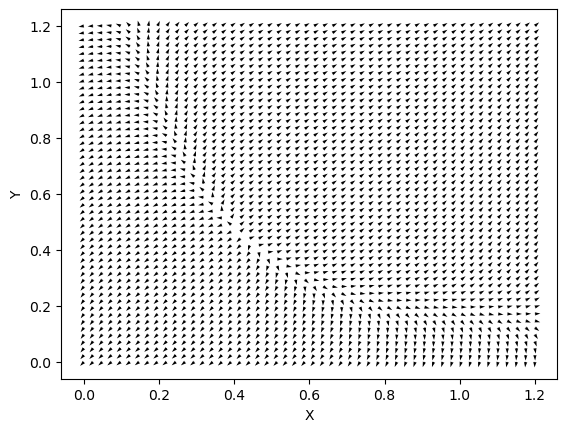

In [17]:
x = np.linspace(0.0, 1.2, N)
y = np.linspace(0.0, 1.2, N)
dx = np.zeros([N, N])
dy = np.zeros([N, N])
X, Y = np.meshgrid(x, y)
for i in tqdm(range(N)):
    for j in range(N):
        dx[i, j], dy[i, j] = model.dF([X[i, j], Y[i, j]])

        # re-scale
        scale = 6 / np.sqrt(dx[i, j] ** 2 + dy[i, j] ** 2)
        dx[i, j] *= scale
        dy[i, j] *= scale

plt.figure(dpi=dpi) 
fig = plt.quiver(X, Y, dx, dy)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()